In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1
# optical_flow_ilk
from PIL import Image
from os import listdir
from os.path import isfile, join
from natsort import os_sorted

path = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\1.25x\divided\TA1\resize'
filenames = listdir(path)
filenames = os_sorted(filenames)
impath0 = join(path, filenames[0]) # first image (reference)
impath1 = join(path, filenames[1]) # second image

impath0,impath1


('\\\\fatherserverdw\\Q\\research\\images\\CLUE\\3D study\\he\\1.25x\\divided\\TA1\\resize\\1C1_TA1.png',
 '\\\\fatherserverdw\\Q\\research\\images\\CLUE\\3D study\\he\\1.25x\\divided\\TA1\\resize\\4C1_TA1.png')

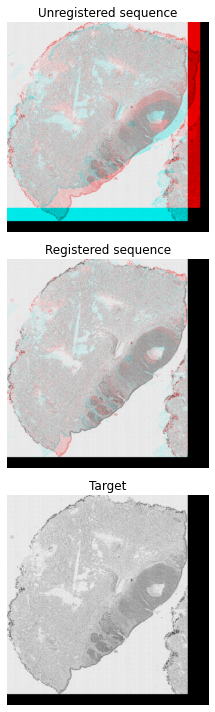

In [3]:
im0 = Image.open(impath0)
im1 = Image.open(impath1)

# convert image to array
im0 = np.asarray(im0)
im1 = np.asarray(im1)

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(im0)
image1 = rgb2gray(im1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]),
                   mode='edge')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0



In [ ]:
# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()